# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

#Import dataset and see

In [4]:
df = pd.read_csv('train.csv', usecols=['Survived', 'Age', 'Fare'])
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.shape

(891, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [7]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


# Train Test split

In [10]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((571, 2), (143, 2))

# 1. Discretizations

In [25]:
encode_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
# encode_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')


## Column transformation

In [26]:
trf1 = ColumnTransformer([
    ('first', encode_age, [0]), # it's better to use column index, instead of column names
    ('second', encode_age, [1])
], remainder='passthrough')

## train and Test Data

In [27]:
trf1.fit_transform(X_train)

array([[5., 5.],
       [4., 4.],
       [5., 5.],
       ...,
       [7., 9.],
       [6., 5.],
       [6., 2.]])

In [28]:
trf1.transform(X_test)

array([[8., 4.],
       [0., 5.],
       [5., 6.],
       [3., 8.],
       [8., 0.],
       [0., 7.],
       [6., 5.],
       [9., 5.],
       [4., 2.],
       [3., 2.],
       [1., 8.],
       [6., 4.],
       [5., 8.],
       [7., 2.],
       [6., 9.],
       [3., 3.],
       [3., 0.],
       [1., 8.],
       [4., 4.],
       [9., 8.],
       [1., 7.],
       [9., 6.],
       [0., 4.],
       [6., 9.],
       [3., 3.],
       [1., 2.],
       [1., 3.],
       [4., 5.],
       [1., 4.],
       [7., 2.],
       [2., 3.],
       [0., 7.],
       [7., 6.],
       [6., 0.],
       [7., 2.],
       [7., 5.],
       [6., 6.],
       [9., 7.],
       [9., 7.],
       [9., 1.],
       [0., 5.],
       [2., 2.],
       [7., 9.],
       [9., 4.],
       [9., 8.],
       [5., 3.],
       [6., 7.],
       [2., 7.],
       [7., 0.],
       [8., 7.],
       [7., 8.],
       [3., 4.],
       [4., 8.],
       [4., 5.],
       [4., 0.],
       [9., 3.],
       [4., 7.],
       [0., 7.],
       [4., 1.

## See some Attribute

In [49]:
trf1.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [50]:
trf1.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

# New dataframe with previous and after transformation

In [29]:
new_df = pd.DataFrame(trf1.fit_transform(X_train), columns=['Age', 'Fare'])
new_df.head()

,Age,Fare
0,5.0,5.0
1,4.0,4.0
2,5.0,5.0
3,6.0,1.0
4,4.0,4.0


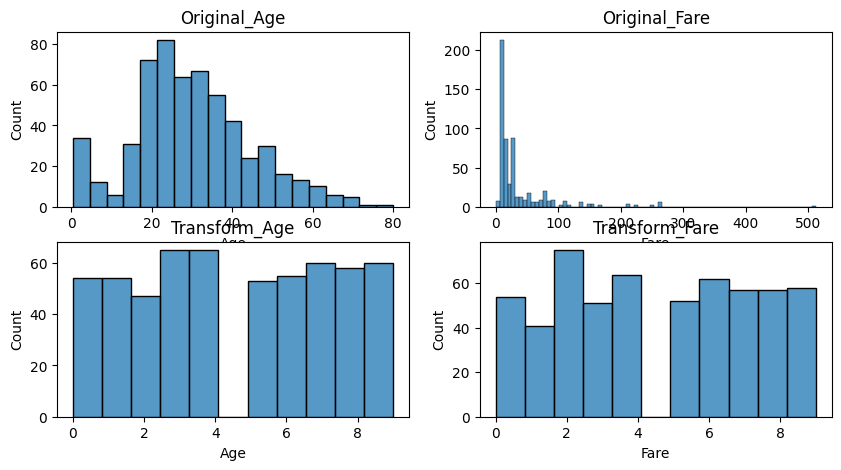

In [43]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

sns.histplot(X_train['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Original_Age')

sns.histplot(X_train['Fare'], ax=axes[0, 1])
axes[0, 1].set_title('Original_Fare')

sns.histplot(new_df['Age'], ax=axes[1, 0])
axes[1, 0].set_title('Transform_Age')

sns.histplot(new_df['Fare'], ax=axes[1, 1])
axes[1, 1].set_title('Transform_Fare')

plt.show()

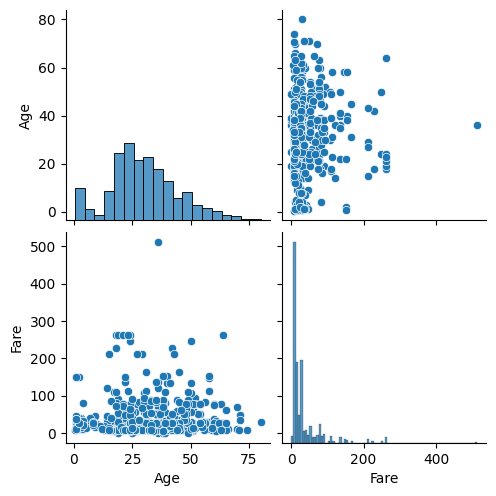

In [32]:
sns.pairplot(X_train)

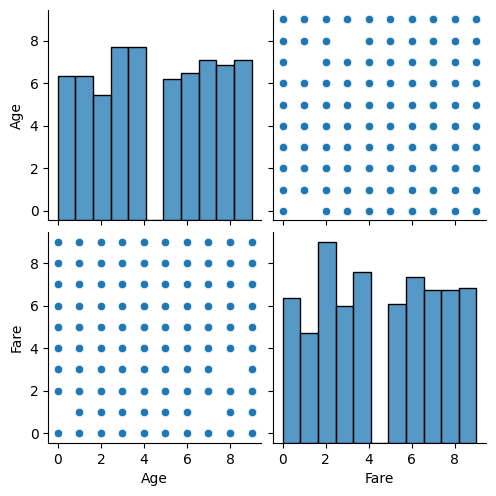

In [44]:
sns.pairplot(new_df)